# Iris Classification

Project Overview: 

# Introduction

# Question

In [1]:
library(readxl)
library(tidyverse)
library(repr)
library(tidymodels)

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.1 ──

✔ ggplot2 3.3.6     ✔ purrr   0.3.4
✔ tibble  3.1.7     ✔ dplyr   1.0.9
✔ tidyr   1.2.0     ✔ stringr 1.4.0
✔ readr   2.1.2     ✔ forcats 0.5.1

── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()

── Attaching packages ────────────────────────────────────── tidymodels 1.0.0 ──

✔ broom        1.0.0     ✔ rsample      1.0.0
✔ dials        1.0.0     ✔ tune         1.0.0
✔ infer        1.0.2     ✔ workflows    1.0.0
✔ modeldata    1.0.0     ✔ workflowsets 1.0.0
✔ parsnip      1.0.0     ✔ yardstick    1.0.0
✔ recipes      1.0.1     

── Conflicts ───────────────────────────────────────── tidymodels_conflicts() ──
✖ scales::discard() masks purrr::discard()
✖ dplyr::filter()   masks stats::filter()
✖ recipes::fixed()  masks stringr::fixed()
✖ dplyr::lag()      masks stats::lag()
✖ yardstick::spec() masks r

In [2]:
iris<- read.csv("data/Iris.csv")
iris<- mutate(iris, Species = as.factor(Species))|>
select(!Id)
iris

SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
<dbl>,<dbl>,<dbl>,<dbl>,<fct>
5.1,3.5,1.4,0.2,Iris-setosa
4.9,3.0,1.4,0.2,Iris-setosa
4.7,3.2,1.3,0.2,Iris-setosa
4.6,3.1,1.5,0.2,Iris-setosa
5.0,3.6,1.4,0.2,Iris-setosa
5.4,3.9,1.7,0.4,Iris-setosa
4.6,3.4,1.4,0.3,Iris-setosa
5.0,3.4,1.5,0.2,Iris-setosa
4.4,2.9,1.4,0.2,Iris-setosa


In [3]:
iris_split <- initial_split(iris, prop= 0.8, strata= Species)
iris_train <- training(iris_split)
iris_test <- testing(iris_split)

In [12]:
set.seed(200)

iris_recipe <- recipe(Species ~., data = iris_train) %>%
    step_scale(all_predictors()) %>%
    step_center(all_predictors())

knn_spec<-nearest_neighbor(weight_func = "rectangular", neighbors = tune())|>
set_engine("kknn")|>
set_mode("classification")

iris_vfold<-vfold_cv(iris_train,v=5,strata=Species)

gridvals<-tibble(neighbors = seq(1,91))

iris_results<-workflow()|>
add_recipe(iris_recipe)|>
add_model(knn_spec)|>
tune_grid(resamples = iris_vfold, grid=gridvals)|>
collect_metrics()
iris_results

neighbors,.metric,.estimator,mean,n,std_err,.config
<int>,<chr>,<chr>,<dbl>,<int>,<dbl>,<chr>
1,accuracy,multiclass,0.9583333,5,0.013176157,Preprocessor1_Model01
1,roc_auc,hand_till,0.9687500,5,0.009882118,Preprocessor1_Model01
2,accuracy,multiclass,0.9583333,5,0.013176157,Preprocessor1_Model02
2,roc_auc,hand_till,0.9807292,5,0.012314157,Preprocessor1_Model02
3,accuracy,multiclass,0.9666667,5,0.015590239,Preprocessor1_Model03
3,roc_auc,hand_till,0.9864583,5,0.013541667,Preprocessor1_Model03
4,accuracy,multiclass,0.9666667,5,0.015590239,Preprocessor1_Model04
4,roc_auc,hand_till,0.9911458,5,0.008854167,Preprocessor1_Model04
5,accuracy,multiclass,0.9666667,5,0.024295633,Preprocessor1_Model05


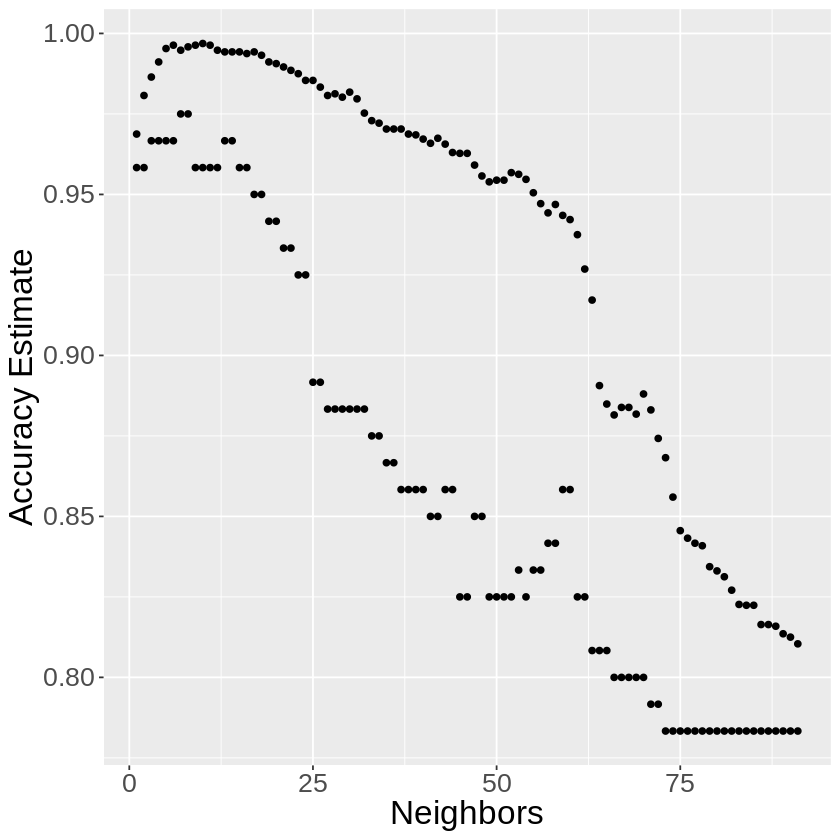

In [20]:
iris_val_plot<-iris_results|>
ggplot(aes(x = neighbors,y=mean))+
geom_point()+
labs(x="Neighbors",y="Accuracy Estimate")+
theme(text = element_text(size = 20))
iris_val_plot

In [28]:
knn_best_spec<-nearest_neighbor(weight_func = "rectangular", neighbors = 25)|>
set_engine("kknn")|>
set_mode("classification")

iris_fit<-workflow()|>
add_recipe(iris_recipe)|>
add_model(knn_best_spec)|>
fit(data=iris_train)

In [29]:
iris_predictions<- predict(iris_fit,iris_test)|>
bind_cols(iris_test)
iris_predictions

.pred_class,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>
Iris-setosa,5.0,3.4,1.5,0.2,Iris-setosa
Iris-setosa,4.8,3.0,1.4,0.1,Iris-setosa
Iris-setosa,5.8,4.0,1.2,0.2,Iris-setosa
Iris-setosa,5.4,3.9,1.3,0.4,Iris-setosa
Iris-setosa,4.6,3.6,1.0,0.2,Iris-setosa
Iris-setosa,5.5,4.2,1.4,0.2,Iris-setosa
Iris-setosa,4.4,3.2,1.3,0.2,Iris-setosa
Iris-setosa,5.1,3.8,1.9,0.4,Iris-setosa
Iris-setosa,4.6,3.2,1.4,0.2,Iris-setosa


In [30]:
iris_accuracy<-iris_predictions|>
metrics(truth= Species,estimate=.pred_class)|>
select(.metric,.estimate)|>
head(1)
iris_accuracy

.metric,.estimate
<chr>,<dbl>
accuracy,0.9333333


In [34]:
iris_cm<-iris_predictions|>
conf_mat(truth = Species,estimate=.pred_class)
iris_cm

                 Truth
Prediction        Iris-setosa Iris-versicolor Iris-virginica
  Iris-setosa              10               0              0
  Iris-versicolor           0               9              1
  Iris-virginica            0               1              9